# Solutions to Challenges for lesson on Data Visualisation

In [1]:
# let's import the libraries and the data we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

> #### Challenge 1
>
> 1. There is a plethora of colors available to use in `matplotlib`.
>    Change the color of the line and the dots in the figure using [your favorite color from this list].
> 2. Use the documentation to change the styling of the line in the line plot
     and the type of marker used in the scatter plot
     (you might need to search online to figure this out).

[your favorite color from this list]: https://stackoverflow.com/a/37232760/2166823

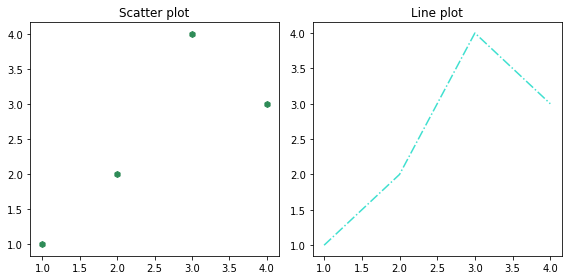

In [20]:

x = [1, 2, 3, 4]
y = [1, 2, 4, 3]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(x, y, color='seagreen', marker = 'h')
ax2.plot(x, y, linestyle='dashdot', color='turquoise')

ax1.set_title('Scatter plot')
ax2.set_title('Line plot')
fig.tight_layout()

for more marker and linestyles, look [here](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers) and [here](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html). 

> #### Challenge 2
>
> Find out which styles and contexts are available in seaborn.
> Try some of them out and choose your favorite style and context.
> *Hint* This information is available both through the built-in and the online documentation.

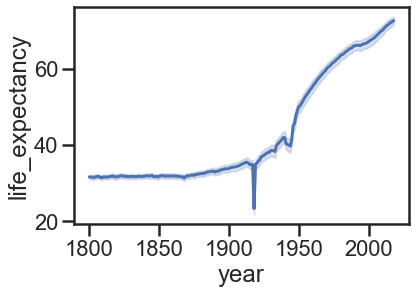

In [22]:
sns.set(context='poster', style="ticks")
ax = sns.lineplot(x='year', y='life_expectancy', data=world_data);

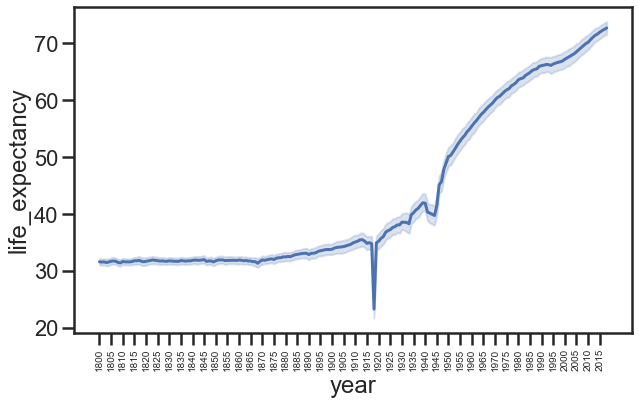

In [21]:
# extra
# let's go further and customize our plot 
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(context='poster', style="ticks")
ax = sns.lineplot(x='year', y='life_expectancy', data=world_data);

xticks=world_data.year.unique()[::5]
ax.set(xticks=xticks);
ax.set_xticklabels(labels =xticks, rotation=90, fontsize = 10);

> ### Challenge 3
>
> 1. To find out the total amount of CO2 released into the atmosphere,
>    use the `co2_per_capita` and `population` columns to create a new column: `co2_total`.
> 2. Plot the total CO2 per year for the world.
> 3. Plot the total CO2 per year for the world and for each region.
> 4. Create a faceted plot comparing total CO2 levels across income groups and regions.

In [24]:
world_data['co2_total'] = world_data['co2_per_capita'] * world_data['population']

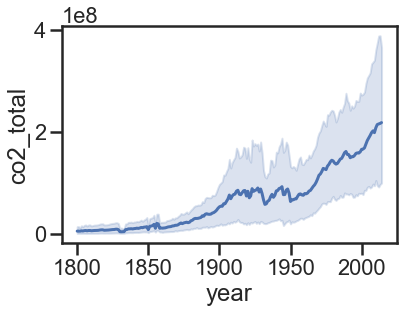

In [25]:
sns.lineplot(x='year',y='co2_total', data=world_data)

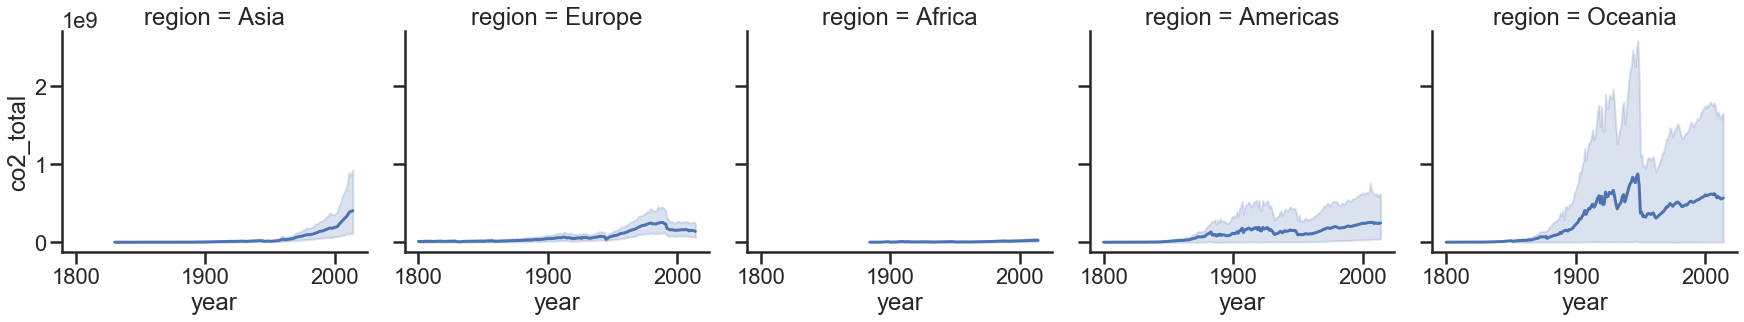

In [30]:
sns.relplot('year','co2_total', col='region', kind='line', data=world_data)

In [39]:
# extra:
# let's see what are the countries in the Oceania region that have such high total CO2 emissions
world_data.loc[(world_data.region == 'Oceania'),'country'].unique()
#world_data.loc[(world_data.sub_region == 'Micronesia'),'country'].unique()

array(['Australia', 'Fiji', 'Kiribati', 'New Zealand', 'Papua New Guinea',
       'Samoa', 'Solomon Islands', 'Tonga', 'United States', 'Vanuatu'],
      dtype=object)

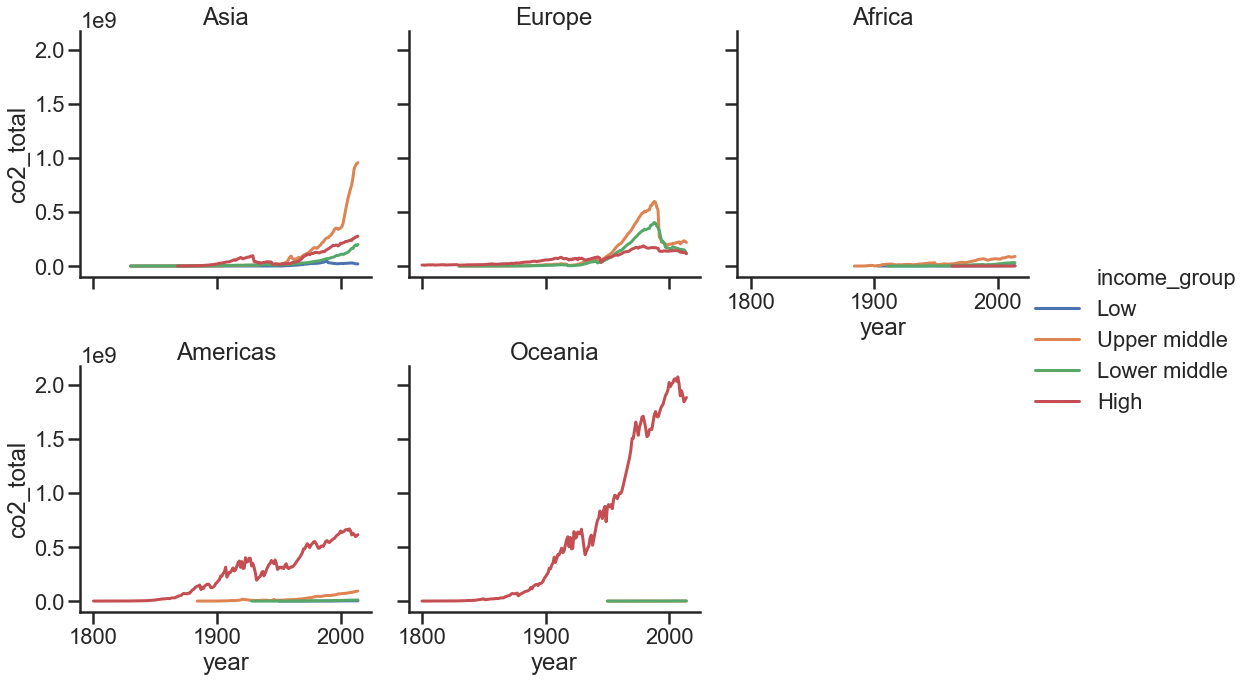

In [47]:
g = sns.relplot(x='year',y='co2_total', col='region', hue='income_group', col_wrap=3, kind='line', 
            ci=None, data=world_data)
g.set_titles('{col_name}');

> #### Challenge 4
>
> Let's use some of the aggregation methods from previous session
> to complement the plots we have just made.
>
> 1. Find out which are the 10 countries with the highest co2 emissions per capita. 
> 2. Find out which are the 10 countries with the highest total co2 emissions.
> 3. Which 10 countries have produced the most CO2 in total since the 1800s?

In [52]:
# reminder that we found 2014 is the latest year that all the countries have CO2 emission measurements:
world_data.dropna(subset=['co2_per_capita'])['year'].agg(['min', 'max'])

min    1800
max    2014
Name: year, dtype: int64

In [53]:
# and we used the subset of that year for our plotting
world_data_2014 = world_data.loc[world_data['year'] == 2014]

In [58]:
# the 10 countries with the highest co2 emissions per capita.
world_data_2014.nlargest(10, 'co2_per_capita')[['country','region']]

,country,region
28465,Qatar,Asia
35473,Trinidad and Tobago,Americas
18610,Kuwait,Asia
2623,Bahrain,Asia
36787,United Arab Emirates,Asia
29560,Saudi Arabia,Asia
20581,Luxembourg,Europe
37439,United States,Americas
37440,United States,Oceania
1747,Australia,Oceania


In [59]:
# the 10 countries with the highest total co2 emissions.
world_data_2014.nlargest(10, 'co2_total')[['country','region']]

,country,region
7222,China,Asia
37439,United States,Americas
37440,United States,Oceania
15763,India,Asia
28903,Russia,Europe
17515,Japan,Asia
13135,Germany,Europe
16201,Iran,Asia
29560,Saudi Arabia,Asia
31969,South Korea,Asia


In [67]:
# the 10 countries tha have produced the most CO2 in total since the 1800s
world_data.groupby(['country'])['co2_total'].sum().nlargest(10)

country
United States     7.520780e+11
China             1.747358e+11
Russia            1.085341e+11
Germany           8.609852e+10
United Kingdom    7.443773e+10
Japan             5.752009e+10
India             4.174063e+10
France            3.555696e+10
Canada            2.947731e+10
Ukraine           2.938304e+10
Name: co2_total, dtype: float64